# Ejercicio estadistico vacas en Bragado y Chivilcoy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

In [2]:
# Generar datos para Chivilcoy (media = 500 kg, desviación estándar = 50 kg)
np.random.seed(0)
pesos_chivilcoy = np.random.normal(500, 50, 100)

# Generar datos para Bragado (media = 550 kg, desviación estándar = 40 kg)
pesos_bragado = np.random.normal(550, 40, 80)

# Crear DataFrames
df_chivilcoy = pd.DataFrame({'Peso': pesos_chivilcoy, 'Campo': 'Chivilcoy'})
df_bragado = pd.DataFrame({'Peso': pesos_bragado, 'Campo': 'Bragado'})

# Combinar en un solo DataFrame
df = pd.concat([df_chivilcoy, df_bragado])

In [3]:
df

,Peso,Campo
0,588.203,Chivilcoy
1,520.008,Chivilcoy
2,548.937,Chivilcoy
3,612.045,Chivilcoy
4,593.378,Chivilcoy
...,...,...
75,577.264,Bragado
76,517.864,Bragado
77,522.418,Bragado
78,531.779,Bragado


In [5]:
promedio_global = df['Peso'].mean()
promedio_global

526.2856115700431

In [6]:
# Promedio por campo
promedio_por_campo = df.groupby('Campo')['Peso'].mean()
promedio_por_campo

# print(f"Promedio por campo {promedio_por_campo}") queda mas lindo

Campo
Bragado     555.405
Chivilcoy   502.990
Name: Peso, dtype: float64

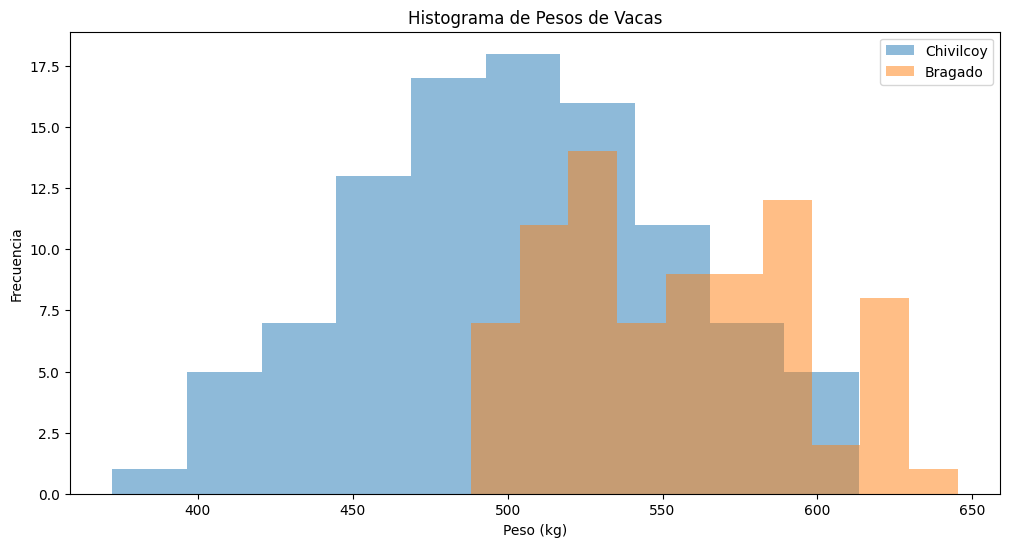

media de chivilcoy 502.9904007767243, std_chivilcoy 50.394112235828985,
 media_bragado 555.4046250616916, std_bragado 40.15785019037109


In [7]:
# Histogramas

plt.figure(figsize=(12, 6))
plt.hist(df_chivilcoy['Peso'], alpha=0.5, label='Chivilcoy')
plt.hist(df_bragado['Peso'], alpha=0.5, label='Bragado')
plt.legend(loc='upper right')
plt.title('Histograma de Pesos de Vacas')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

# Media y desviación estándar por campo y le agrego debajo del grafico.
media_chivilcoy = np.mean(pesos_chivilcoy)
std_chivilcoy = np.std(pesos_chivilcoy)

media_bragado = np.mean(pesos_bragado)
std_bragado = np.std(pesos_bragado)

print(f"media de chivilcoy {media_chivilcoy}, std_chivilcoy {std_chivilcoy},\n media_bragado {media_bragado}, std_bragado {std_bragado}")

Supongamos que tenemos una nueva vaca con un peso de, por ejemplo, 520 kg. Queremos determinar de qué campo (Chivilcoy o Bragado) es más probable que provenga esta vaca. Para ello, podemos utilizar un intervalo de confianza. Calcular el intervalo de confianza para cada campo: Utilizaremos la media y la desviación estándar que ya hemos calculado para cada campo. Podemos calcular un intervalo de confianza del 95% (o cualquier otro valor que elijamos) para el peso de las vacas en cada campo.

In [8]:
# Intervalo de confianza para Chivilcoy
intervalo_chivilcoy = stats.norm.interval(0.95, loc=media_chivilcoy, scale=std_chivilcoy)

# Intervalo de confianza para Bragado
intervalo_bragado = stats.norm.interval(0.95, loc=media_bragado, scale=std_bragado)


print(f"Para tener una confianza del 95% el intervalo de chivilcoy es de  {intervalo_chivilcoy},\ny el intervalo de bragado es {intervalo_bragado}")

Para tener una confianza del 95% el intervalo de chivilcoy es de  (404.2197557616302, 601.7610457918183),
y el intervalo de bragado es (476.6966849920093, 634.1125651313739)


Evaluar en qué intervalo cae el peso de la nueva vaca: Si el peso de la nueva vaca cae dentro del intervalo de confianza de uno de los campos pero no del otro, podemos estar razonablemente seguros de que la vaca proviene de ese campo.

Si el peso cae dentro de ambos intervalos, la decisión es más incierta y podríamos necesitar más información o aplicar otras técnicas estadísticas.

In [9]:
peso_nueva_vaca = 465  # Ejemplo

# Cálculo de la probabilidad de que la vaca provenga de cada campo
prob_chivilcoy = stats.norm.pdf(peso_nueva_vaca, media_chivilcoy, std_chivilcoy)
prob_bragado = stats.norm.pdf(peso_nueva_vaca, media_bragado, std_bragado)

print(f"La prob de chivilcoy es {prob_chivilcoy:2f}, la prob de bragado es {prob_bragado:2f}")


La prob de chivilcoy es 0.005958, la prob de bragado es 0.000788


### T-Test
Por último, realizamos un t-test para evaluar si hay una diferencia significativa en el tratamiento de alimentación entre los campos.

In [10]:
t_stat, p_value = stats.ttest_ind(pesos_chivilcoy, pesos_bragado)
t_stat, p_value

(-7.533315514884322, 2.401672359590475e-12)

El resultado del t-test incluye dos componentes: la estadística t (t_stat) y el valor p (p_value).

### Estadística t (t_stat)
El valor de t_stat = -7.533 representa la estadística t calculada a partir de las dos muestras (pesos de las vacas en Chivilcoy y Bragado). Un valor de t negativo indica que la media de la primera muestra (Chivilcoy) es menor que la media de la segunda muestra (Bragado). Cuanto más grande es el valor absoluto de la estadística t, más fuerte es la evidencia en contra de la hipótesis nula (que ambas muestras tienen medias iguales).

### Valor p (p_value)
El valor p = 2.401672359590475e-12 es extremadamente pequeño, prácticamente cero. En el contexto del t-test, un valor p muy pequeño (generalmente menor que 0.05) es un indicador fuerte contra la hipótesis nula. En otras palabras, hay evidencia muy fuerte para rechazar la hipótesis nula de que las medias de los dos grupos son iguales.

### Interpretación
En resumen, el resultado del t-test sugiere que hay una diferencia estadísticamente significativa en los pesos de las vacas entre los campos de Chivilcoy y Bragado. El valor de la estadística t indica que las vacas en Bragado tienden a pesar más que las de Chivilcoy. El valor p extremadamente pequeño nos da confianza en esta conclusión.

# Bootstraping

Bootstrap es una técnica de re-muestreo que permite estimar la distribución de una estadística (como la media o la desviación estándar) al crear múltiples muestras nuevas a partir de una única muestra original. Estas nuevas muestras se generan seleccionando elementos aleatoriamente de la muestra original, con reemplazo.

Función bootstrap_sample: Esta función toma una muestra de datos y su tamaño n, y devuelve una nueva muestra generada al seleccionar aleatoriamente n elementos de la muestra original, con reemplazo.

* Estamos utilizando una columna llamada 'mpg' del DataFrame df como nuestros datos originales. Eliminamos cualquier valor nulo con .dropna().

* Inicialización de bootstrap_means: Esta es una lista vacía donde almacenaremos las medias de todas nuestras muestras de bootstrap.

* Loop for: Aquí, creamos 1000 muestras de bootstrap. Para cada una, calculamos su media y la agregamos a la lista bootstrap_means.

* Finalmente, calculamos la media y la desviación estándar de todas las medias de muestras de bootstrap que hemos recopilado.

- Media de las Medias (mean_of_means): Esta es una estimación de la media de la población a partir de las muestras de bootstrap. Es una forma de confirmar la media de la muestra original.

- Desviación Estándar de las Medias (std_of_means): Esta es una estimación de cuánto varían las medias de las muestras de bootstrap. Nos da una idea del error estándar y de cómo de precisa es nuestra estimación de la media.

Estos dos valores juntos nos dan una idea más precisa de la distribución de la estadística (en este caso, la media) que estamos estudiando.

In [ ]:
df = sns.load_dataset('mpg')
#saco los nulos para mejor analisis
original_data = df['mpg'].dropna()

In [ ]:
def bootstrap_sample(data, n):
    return np.random.choice(data, size=n, replace=True)

In [ ]:
# Inicializar una lista vacía para almacenar las medias de las muestras de bootstrap
bootstrap_means = []

for _ in range(100):
    sample = bootstrap_sample(original_data, len(original_data))
    sample_mean = sample.mean()
    bootstrap_means.append(sample_mean)

# Calcular la media y la desviación estándar de las medias de las muestras de bootstrap
mean_of_means = np.mean(bootstrap_means)
std_of_means = np.std(bootstrap_means)

mean_of_means, std_of_means

In [ ]:
original_data.mean()  #Comparo

# Merges

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df1 = pd.DataFrame({'A': np.random.randint(1, 100, 10),
                    'B': np.random.randint(1, 100, 10),
                    'key': list(range(1, 6)) * 2})

df2 = pd.DataFrame({'C': np.random.randint(1, 100, 7),
                    'D': np.random.randint(1, 100, 7),
                    'key': list(range(2, 9))})

print("Sample data generated.")

Sample data generated.


In [28]:
inner_merged_df = pd.merge(df1, df2, on='key', how='inner')
inner_merged_df

,A,B,key,C,D
0,5,28,2,1,66
1,26,87,2,1,66
2,50,30,3,84,21
3,21,8,3,84,21
4,88,34,4,37,37
5,98,10,4,37,37
6,31,54,5,82,69
7,58,55,5,82,69


In [29]:
outer_merged_df= pd.merge(df1,df2, on='key', how= 'outer')
outer_merged_df

,A,B,key,C,D
0,25.000,24.000,1,NaN,NaN
1,55.000,52.000,1,NaN,NaN
2,5.000,28.000,2,1.000,66.000
3,26.000,87.000,2,1.000,66.000
4,50.000,30.000,3,84.000,21.000
5,21.000,8.000,3,84.000,21.000
6,88.000,34.000,4,37.000,37.000
7,98.000,10.000,4,37.000,37.000
8,31.000,54.000,5,82.000,69.000
9,58.000,55.000,5,82.000,69.000


In [30]:
left_merged_df = pd.merge(df1, df2, on= 'key', how= 'left')
left_merged_df

,A,B,key,C,D
0,25,24,1,NaN,NaN
1,5,28,2,1.000,66.000
2,50,30,3,84.000,21.000
3,88,34,4,37.000,37.000
4,31,54,5,82.000,69.000
5,55,52,1,NaN,NaN
6,26,87,2,1.000,66.000
7,21,8,3,84.000,21.000
8,98,10,4,37.000,37.000
9,58,55,5,82.000,69.000


In [31]:
right_merged_df = pd.merge(df1, df2, on= 'key', how= 'right')
right_merged_df

,A,B,key,C,D
0,5.000,28.000,2,1,66
1,26.000,87.000,2,1,66
2,50.000,30.000,3,84,21
3,21.000,8.000,3,84,21
4,88.000,34.000,4,37,37
5,98.000,10.000,4,37,37
6,31.000,54.000,5,82,69
7,58.000,55.000,5,82,69
8,NaN,NaN,6,21,81
9,NaN,NaN,7,4,48


In [32]:
correlation_matrix = inner_merged_df.corr()
correlation_matrix

,A,B,key,C,D
A,1.000,-0.251,0.526,0.112,-0.330
B,-0.251,1.000,-0.027,-0.256,0.703
key,0.526,-0.027,1.000,0.636,0.139
C,0.112,-0.256,0.636,1.000,-0.356
D,-0.330,0.703,0.139,-0.356,1.000


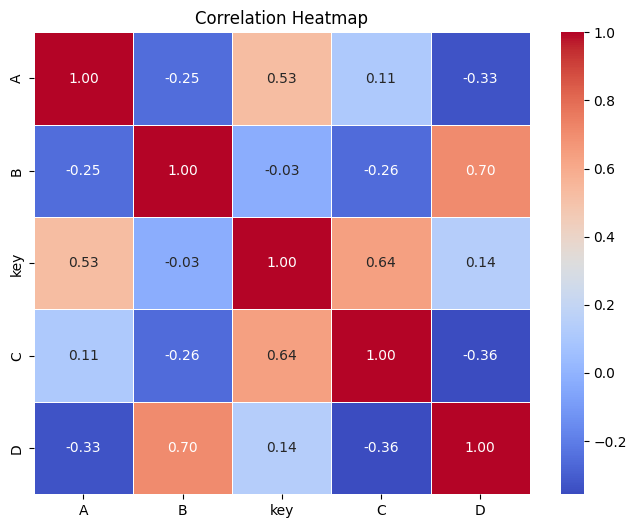

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Regresion Lineal + Modelos + Multivariada


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("mpg").dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.000,8,307.000,130.000,3504,12.000,70,usa,chevrolet chevelle malibu
1,15.000,8,350.000,165.000,3693,11.500,70,usa,buick skylark 320
2,18.000,8,318.000,150.000,3436,11.000,70,usa,plymouth satellite
3,16.000,8,304.000,150.000,3433,12.000,70,usa,amc rebel sst
4,17.000,8,302.000,140.000,3449,10.500,70,usa,ford torino


In [37]:
df.describe().applymap(lambda x: round(x))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


<AxesSubplot: xlabel='horsepower', ylabel='weight'>

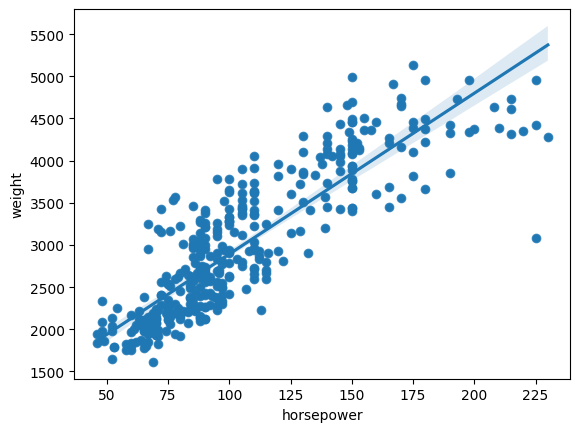

In [40]:
sns.scatterplot(x='horsepower', y='weight', data=df)    #relacion entre el peso y los caballos de fuerza.
sns.regplot(x='horsepower', y='weight', data=df)        # recta que mínimice la distancia a todos los puntos.

# SI Y = b0 + b1 * Horsepower, entonces buscaré la mínima distancia entre el valor de Y y el valor real de Weigths

In [41]:
round(df.corr(),2)

C:\Users\cvsob\AppData\Local\Temp\ipykernel_13132\2139689135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),2)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000,-0.780,-0.810,-0.780,-0.830,0.420,0.580
cylinders,-0.780,1.000,0.950,0.840,0.900,-0.500,-0.350
displacement,-0.810,0.950,1.000,0.900,0.930,-0.540,-0.370
horsepower,-0.780,0.840,0.900,1.000,0.860,-0.690,-0.420
weight,-0.830,0.900,0.930,0.860,1.000,-0.420,-0.310
acceleration,0.420,-0.500,-0.540,-0.690,-0.420,1.000,0.290
model_year,0.580,-0.350,-0.370,-0.420,-0.310,0.290,1.000


In [42]:
print('R-cuadrado = ', (df.corr()['weight']['horsepower'])**2)

R-cuadrado =  0.7474254996898221


C:\Users\cvsob\AppData\Local\Temp\ipykernel_13132\1573751985.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('R-cuadrado = ', (df.corr()['weight']['horsepower'])**2)


C:\Users\cvsob\AppData\Local\Temp\ipykernel_13132\4104140315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12})


<AxesSubplot: >

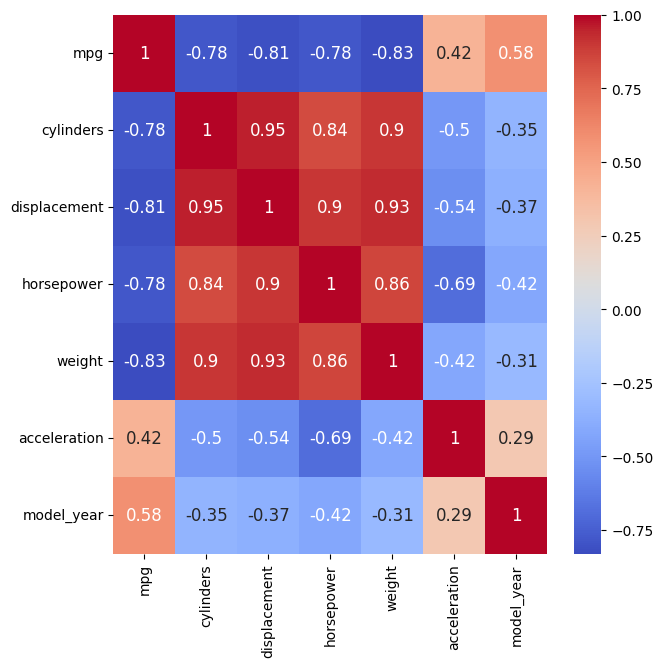

In [43]:
plt.figure(figsize = (7,7))
sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12})

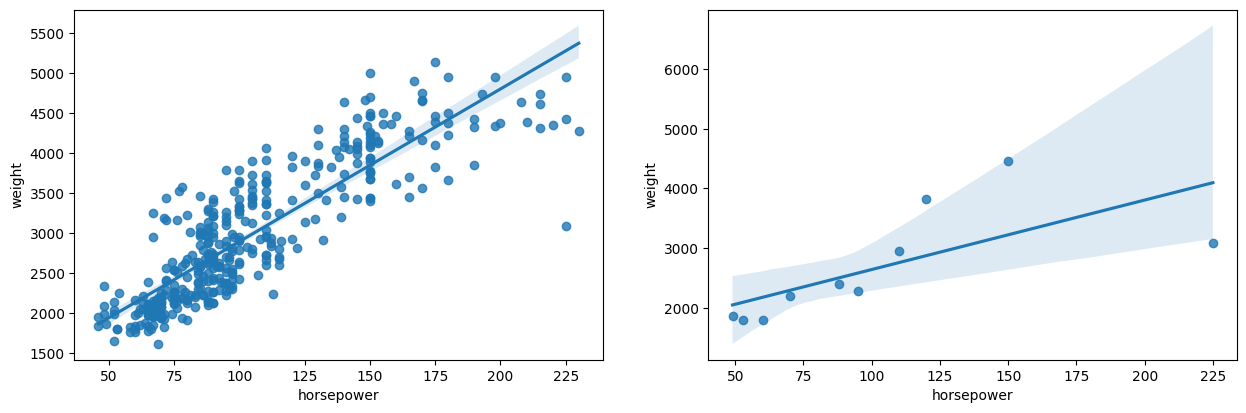

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=df, ci=95) #Poblacion
plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=df.sample(10, random_state=6), ci=95)  #Muestra

## Statsmodel

OP1- Version Clasica

In [45]:
import statsmodels.api as sm
Y = df['weight']
X = df['horsepower']
model = sm.OLS(Y, X).fit() # busca el mejor Beta
model.predict(X) #  Y_pred (la linea que pasa por la min distancia a los puntos)

0     3559.156
1     4517.390
2     4106.718
3     4106.718
4     3832.937
        ...   
393   2354.518
394   1423.662
395   2299.762
396   2162.872
397   2245.006
Length: 392, dtype: float64

OP2 - Formula API

In [46]:
# Instanciate a model
import statsmodels.formula.api as smf

model = smf.ols(formula='weight ~ horsepower', data=df)

# Train the model to find best line
model = model.fit()
model

In [49]:
model.summary() #Interpretacion

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.36e-118
Time:                        15:08:49   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.000     861.593    1107.408
horsepower    19.0782      0.562     33.972      0.000      17.974      20.182
==============================================================================
Omnibus:                       11.785   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.895
Skew:                           0.109   Prob(JB):                     1.76e-05
Kurtosis:                       4.137   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Chequeo la formula
n=390
residuals = model.predict(df['horsepower']) - df['weight']
residuals.std()/df.horsepower.std() * 1/(n**0.5)

0.5615843732511717

In [51]:
predicted_weights = model.predict(df['horsepower'])
predicted_weights

0     3464.661
1     4132.397
2     3846.225
3     3846.225
4     3655.443
        ...   
393   2625.222
394   1976.565
395   2587.066
396   2491.675
397   2548.910
Length: 392, dtype: float64

In [52]:
residuals = predicted_weights - df['weight']
residuals

0      -39.339
1      439.397
2      410.225
3      413.225
4      206.443
        ...   
393   -164.778
394   -153.435
395    292.066
396   -133.325
397   -171.090
Length: 392, dtype: float64

<AxesSubplot: ylabel='Count'>

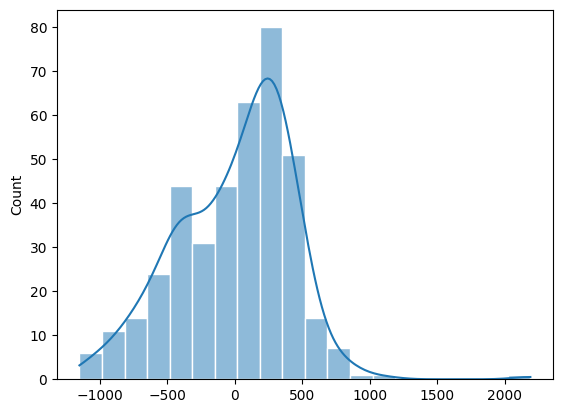

In [53]:
# visual check
sns.histplot(residuals, kde=True, edgecolor='w')

Text(0, 0.5, 'Residual weight')

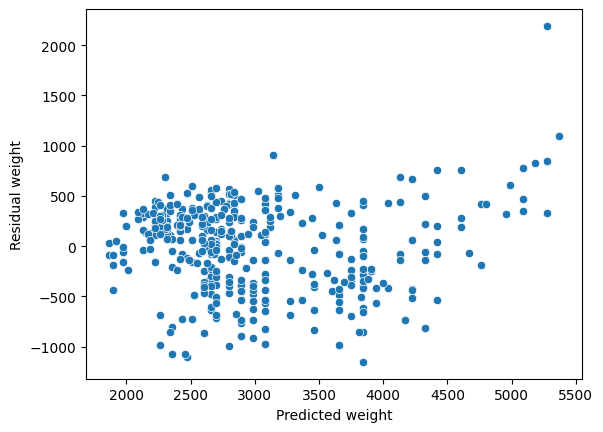

In [54]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=predicted_weights, y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight')

### Regresion Multivariada

In [55]:
# run OLS model
model2 = smf.ols(formula='weight ~ horsepower + cylinders', data=df).fit()  # Le agrego variables cylinders
model2.rsquared

0.8458154043882244

In [56]:
model2.params

Intercept    528.877
horsepower     8.231
cylinders    290.356
dtype: float64

In [57]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [58]:
model3 = smf.ols(formula='weight ~ C(origin)', data=df).fit()
model3.params

Intercept            2433.471
C(origin)[T.japan]   -212.243
C(origin)[T.usa]      939.019
dtype: float64

In [59]:
df.groupby('origin').agg({'weight':'mean'})

,weight
origin,
europe,2433.471
japan,2221.228
usa,3372.490


In [60]:
# Drop the intercept if you want to
model3 = smf.ols(formula='weight ~ C(origin) -1', data=df).fit()
model3.params

C(origin)[europe]   2433.471
C(origin)[japan]    2221.228
C(origin)[usa]      3372.490
dtype: float64

** Utilizar Fundamentals de reg linel.

# Ecommerce


# Gregors

# Clasificacion

In [61]:
%load_ext autoreload    #Carga la extensión autoreload, que proporciona funcionalidad para recargar automáticamente los módulos.
%autoreload 2   # Configura la recarga automática para todos los módulos. El valor 2 significa que todos los módulos se recargarán cada vez que se ejecute una celda, incluso si no han sido importados explícitamente.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
alien = {
    'alien1': {'mood': 'happy', 'sentence': 'aack, aack, aack!'},
    'alien2': {'mood': 'sad', 'sentence': 'beep beep!'},
    'alien3': {'mood': 'happy', 'sentence': 'aack beep aack!'},
    'alien4': {'mood': 'sad', 'sentence': 'aack beep beep beep!'}
}

In [64]:
df = pd.DataFrame(alien).T  #Esto es el operador de transposición. Transponer un DataFrame significa intercambiar filas y columnas.
df

,mood,sentence
alien1,happy,"aack, aack, aack!"
alien2,sad,beep beep!
alien3,happy,aack beep aack!
alien4,sad,aack beep beep beep!


Sentiment analysis classifier 

Una oración asigna estos puntajes:
* Aack: 1 point
* Beep: –1 points

Procedimiento:

Sumar el puntaje de todas las palabras de la oración.

* Si la puntuación es positiva o cero, predecir que la oración es feliz.
* Si la puntuación es negativa, predecir que la oración es triste.


In [65]:
df['aack'] = df['sentence'].apply(lambda x: x.count('aack'))
df['beep'] = df['sentence'].apply(lambda x: x.count('beep'))
df

,mood,sentence,aack,beep
alien1,happy,"aack, aack, aack!",3,0
alien2,sad,beep beep!,0,2
alien3,happy,aack beep aack!,2,1
alien4,sad,aack beep beep beep!,1,3


In [66]:
# Creo mi SCORE, si dice aack sumo 1 y si dice beep resto uno por oración.
# Elimino caracteres especiales y convierto a minúsculas

def algoritmo_clasificacion(sentence):
    sentence = sentence.replace('!', '').replace(',', '').lower() #elimino caracteres especiales y convierto a minúsculas
    score = 0
    for word in sentence.split(): #recorro la oración
        if word == 'aack':
            score += 1
        elif word == 'beep':
            score -= 1
    return score

In [67]:
# Creo mi columna score
df['score'] = df['sentence'].apply(algoritmo_clasificacion)
df

,mood,sentence,aack,beep,score
alien1,happy,"aack, aack, aack!",3,0,3
alien2,sad,beep beep!,0,2,-2
alien3,happy,aack beep aack!,2,1,1
alien4,sad,aack beep beep beep!,1,3,-2


In [72]:
df['mood'] = df['mood'].apply(lambda x: 1 if x == 'happy' else 0)
df

,mood,sentence,aack,beep,score
alien1,1,"aack, aack, aack!",3,0,3
alien2,0,beep beep!,0,2,-2
alien3,1,aack beep aack!,2,1,1
alien4,0,aack beep beep beep!,1,3,-2


### Ejemplo 2


In [73]:
alien = {
    "alien1": {"mood": "Sad", "sentence": "Crack!"},
    "alien2": {"mood": "Sad", "sentence": "Doink doink!"},
    "alien3": {"mood": "Sad", "sentence": "Crack doink!"},
    "alien4": {"mood": "Sad", "sentence": "Crack doink crack!"},
    "alien5": {"mood": "Happy", "sentence": "Doink crack doink doink!"},
    "alien6": {"mood": "Happy", "sentence": "Crack doink doink crack!"},
    "alien7": {"mood": "Happy", "sentence": "Doink doink crack crack crack!"},
    "alien8": {"mood": "Happy", "sentence": "Crack doink doink crack doink!"}
}

#create a dataframe
df2 = pd.DataFrame(alien).T
df2

,mood,sentence
alien1,Sad,Crack!
alien2,Sad,Doink doink!
alien3,Sad,Crack doink!
alien4,Sad,Crack doink crack!
alien5,Happy,Doink crack doink doink!
alien6,Happy,Crack doink doink crack!
alien7,Happy,Doink doink crack crack crack!
alien8,Happy,Crack doink doink crack doink!


In [74]:
df2['crack'] = df2['sentence'].apply(lambda x: x.replace('!', '').replace(',', '').lower().count('crack'))  #limpio dataset y cuento crack/doink
df2['doink'] = df2['sentence'].apply(lambda x: x.replace('!', '').replace(',', '').lower().count('doink'))

In [75]:
df2["score_planeta_nuevo"] = df2["doink"] + df2["crack"]
df2

,mood,sentence,crack,doink,score_planeta_nuevo
alien1,Sad,Crack!,1,0,1
alien2,Sad,Doink doink!,0,2,2
alien3,Sad,Crack doink!,1,1,2
alien4,Sad,Crack doink crack!,2,1,3
alien5,Happy,Doink crack doink doink!,1,3,4
alien6,Happy,Crack doink doink crack!,2,2,4
alien7,Happy,Doink doink crack crack crack!,3,2,5
alien8,Happy,Crack doink doink crack doink!,2,3,5


### Utilizar Coding Perceptron e importar librerias (no creo que se use todavia)

# Logic Space

LOGIC es la función inversa de la función logística. La función logit es comúnmente utilizada en el contexto de la regresión logística en estadísticas y aprendizaje automático. 

La función logit es útil porque transforma las probabilidades (que están entre 0 y 1) en log-odds (que pueden variar desde menos infinito hasta más infinito). 

Esto hace que la relación entre las variables independientes y la variable dependiente sea lineal, lo que facilita la aplicación de técnicas de regresión.

In [80]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'p')

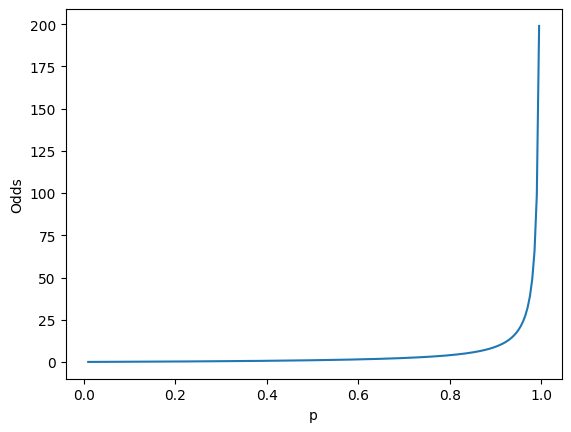

In [81]:
# Odds cruve
p = np.arange(0.01,1,0.005)
odds = p / (1-p)
plt.plot(p, odds); plt.ylabel("Odds"); plt.xlabel("p")

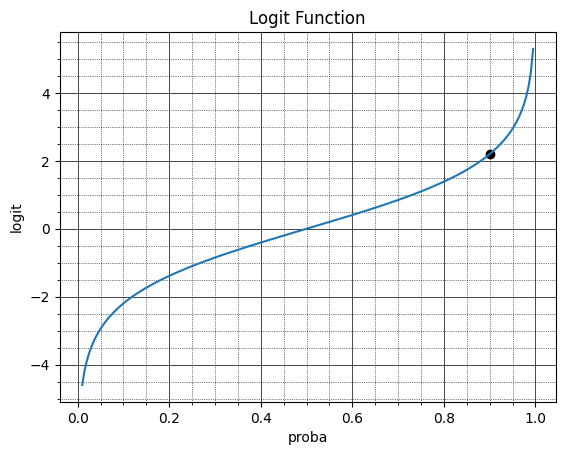

In [82]:
# log-odds = LOGIT
plt.plot(p, np.log(odds)); plt.grid()
plt.title('Logit Function'); plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.xlabel('proba'); plt.ylabel('logit')
plt.scatter(0.9, np.log(0.9/(1-0.9)), c='black')    # este punto específico puede ser importante, ya que corresponde al límite entre las dos clases cuando la probabilidad es 0.9.

# Grupos Dataframe

**1 Target: ventana temporal de chequeo**

El problema que tenemos es que cada usuario que puede llegar a tener un credito lo tiene en diferentes momentos en comparación a los demas. Sin embargo, no es la misma ventana de transaccionalibilidad para todos.

In [83]:
df = pd.read_csv('users.csv')

In [84]:
df.head()

,Unnamed: 0,target,id_cliente,orden_nro,ciudad,monto,segmento,microsegmento,fecha_orden,fecha_de_vencimiento,fecha_de_pago,order_closed_cohort,ord_due_cohort,payment_cohort,dif_pymt_date,dow_closed,cantidad_sesiones,tiempo_promedio_navegacion,days_ultima_navegacion
0,0,0,-254861,71455943905963,BOG,277133.550,restaurante,cafetería,2022-10-06,2022-10-13,2022-10-12,2022-10-01,2022-10-01,2022-10-01,-1.000,3,21,614.333,1.000
1,1,0,-254861,52135310417582,BOG,299324.790,restaurante,cafetería,2022-11-16,2022-11-23,2022-12-01,2022-11-01,2022-11-01,2022-12-01,8.000,2,23,642.130,1.000
2,2,0,-254861,54309973913593,BOG,292811.250,restaurante,cafetería,2022-12-03,2022-12-10,2022-12-13,2022-12-01,2022-12-01,2022-12-01,3.000,5,22,558.909,1.000
3,3,1,-254861,118482691333265,BOG,277073.570,restaurante,cafetería,2022-12-17,2022-12-24,2023-01-13,2022-12-01,2022-12-01,2023-01-01,20.000,5,29,469.034,0.000
4,4,0,-254861,25274666404925,BOG,297466.490,restaurante,cafetería,2023-01-18,2023-01-25,2023-01-27,2023-01-01,2023-01-01,2023-01-01,2.000,2,53,294.113,1.000


In [85]:
df.shape

(21215, 19)

In [87]:
df.columns

Index(['Unnamed: 0', 'target', 'id_cliente', 'orden_nro', 'ciudad', 'monto',
       'segmento', 'microsegmento', 'fecha_orden', 'fecha_de_vencimiento',
       'fecha_de_pago', 'order_closed_cohort', 'ord_due_cohort',
       'payment_cohort', 'dif_pymt_date', 'dow_closed', 'cantidad_sesiones',
       'tiempo_promedio_navegacion', 'days_ultima_navegacion'],
      dtype='object')

In [86]:
df[df.id_cliente == -254861][["fecha_orden","target"]]

,fecha_orden,target
0,2022-10-06,0
1,2022-11-16,0
2,2022-12-03,0
3,2022-12-17,1
4,2023-01-18,0


In [88]:
df.segmento.value_counts(dropna=False)

restaurante    18375
hogar           1495
comercio        1068
duplicated       199
institución       72
fraud              5
na                 1
Name: segmento, dtype: int64

### Analisis de variables

In [89]:
df["target"].value_counts()

0    17782
1     3433
Name: target, dtype: int64

In [90]:
df.groupby(["segmento"]).agg(cantidad=("target","sum"))

,cantidad
segmento,
comercio,186
duplicated,37
fraud,0
hogar,327
institución,11
na,0
restaurante,2872


In [91]:
df.groupby(["segmento"]).agg(cantidad=("target","mean"))

,cantidad
segmento,
comercio,0.174
duplicated,0.186
fraud,0.000
hogar,0.219
institución,0.153
na,0.000
restaurante,0.156


In [92]:
df['fecha_orden'] = pd.to_datetime(df['fecha_orden'])

In [93]:
df['fecha_entrega_lag'] = df.groupby('id_cliente')['fecha_orden'].shift(-1)

In [94]:
df[df.id_cliente == -254861][["fecha_orden","target",'fecha_entrega_lag']]

,fecha_orden,target,fecha_entrega_lag
0,2022-10-06,0,2022-11-16
1,2022-11-16,0,2022-12-03
2,2022-12-03,0,2022-12-17
3,2022-12-17,1,2023-01-18
4,2023-01-18,0,NaT


In [95]:
df['diferencia_dias'] = (df['fecha_entrega_lag'] - df['fecha_orden']).dt.days

In [96]:
df[df.id_cliente == -254861][["fecha_orden","target",'fecha_entrega_lag','diferencia_dias']]

,fecha_orden,target,fecha_entrega_lag,diferencia_dias
0,2022-10-06,0,2022-11-16,41.000
1,2022-11-16,0,2022-12-03,17.000
2,2022-12-03,0,2022-12-17,14.000
3,2022-12-17,1,2023-01-18,32.000
4,2023-01-18,0,NaT,NaN


<AxesSubplot: ylabel='diferencia_dias'>

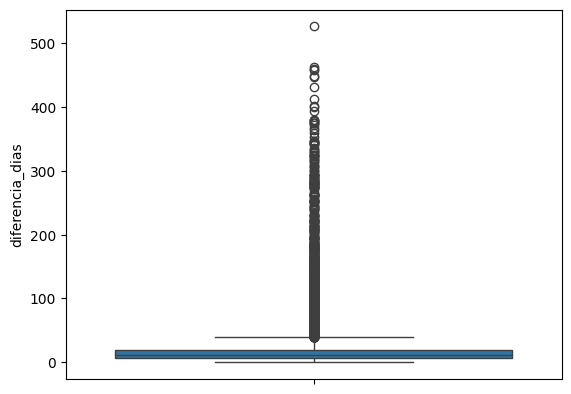

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df["diferencia_dias"])

In [99]:
def discretizar_dias(x):
    if x > 100:
        return "+100"
    else:
        return "-100"

df["discretos_dias"] = df["diferencia_dias"].apply(discretizar_dias)

In [100]:
df["discretos_dias"].value_counts()

-100    20747
+100      468
Name: discretos_dias, dtype: int64

In [101]:
limite = 100
df_limit = df[df['diferencia_dias']<limite]

filtro1 = df_limit.target == 1 #me quedo con un dataset de morosos
filtro2 = df_limit.target == 0 #me quedo con un dataset de pagadores

C:\Users\cvsob\AppData\Local\Temp\ipykernel_13132\2100814544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limit[filtro2]['diferencia_dias'], label="buen_pagador")
C:\Users\cvsob\AppData\Local\Temp\ipykernel_13132\2100814544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limit[f

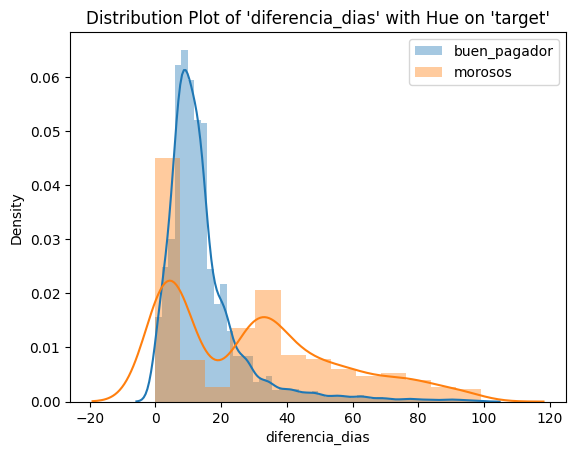

In [103]:
sns.distplot(df_limit[filtro2]['diferencia_dias'], label="buen_pagador")
sns.distplot(df_limit[filtro1]['diferencia_dias'], label="morosos")

plt.title("Distribution Plot of 'diferencia_dias' with Hue on 'target'")
plt.legend()
plt.show()


# Titanic Dataframe

In [34]:
import pandas as pd
import seaborn as sns

In [35]:
titanic = sns.load_dataset("titanic") #seaborn tiene datasets,no es necesario descargarlo, los trae via API
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


Alive = Survive==1

Dead = Survive ==0

In [36]:
import statsmodels.formula.api as smf

In [37]:
model1 = smf.logit(formula='survived ~ 1', data=titanic).fit()
model1.params

Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4


Intercept   -0.473288
dtype: float64

In [38]:
cross_tab = pd.DataFrame({
    'count': titanic['survived'].value_counts(),
    'percentage': titanic['survived'].value_counts(normalize=True)
    })

round(cross_tab,2)

,count,percentage
0,549,0.62
1,342,0.38


In [39]:
model3 = smf.logit(formula='survived ~ fare', data=titanic).fit()
model3.params

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


Intercept   -0.941330
fare         0.015197
dtype: float64

¿Cómo interpretar el coeficiente de tarifa?
Aumentar la tarifa en 1 dólar aumenta las probabilidades logarítmicas de sobrevivir en 0,015

Tomando la exponencial:
Exp(0.015)=1.01

Por cada dólar adicional gastado en la tarifa, las probabilidades de sobrevivir aumentan en un 1%

¿Cómo interpretar el intercepto?
El log-odds de sobrevivir para un pasajero que no pagó nada es -0.94

In [40]:
model2 = smf.logit(formula='survived ~ C(pclass)', data=titanic).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.607805
         Iterations 5


Intercept         0.530628
C(pclass)[T.2]   -0.639431
C(pclass)[T.3]   -1.670399
dtype: float64

0.53 es el log-odds de sobrevivir para un pasajero que estaba en la primera clase

El log-odds es el logaritmo natural de la razón de probabilidades. En el contexto de la regresión logística, se interpreta como la relación de las probabilidades logarítmicas de que el resultado sea un "éxito" (en este caso, sobrevivir) en comparación con el "fracaso".
En este caso, un valor de 0.53 significa que el log-odds de sobrevivir para un pasajero de primera clase es 0.53

-0,63 es la disminución en las probabilidades logarítmicas de supervivencia de un pasajero de 2ª clase, en relación con un pasajero de 1ª clase.

Este valor negativo indica que, en comparación con un pasajero de primera clase, se espera que las probabilidades logarítmicas de supervivencia sean menores para un pasajero de segunda clase.
La magnitud del coeficiente (-0.63) indica la magnitud de la disminución en las probabilidades logarítmicas. Cuanto más negativo sea el coeficiente, mayor será la disminución en las probabilidades logarítmicas.

In [41]:
model2 = smf.logit(formula='survived ~ fare + C(sex) + age', data=titanic).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.501450
         Iterations 6


Intercept         0.934841
C(sex)[T.male]   -2.347599
fare              0.012773
age              -0.010570
dtype: float64

In [42]:
model2.summary()    #Evaluo Performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.2576
Time:                        20:49:40   Log-Likelihood:                -358.04
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.419e-53
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9348      0.239      3.910      0.000       0.466       1.403
C(sex)[T.male]    -2.3476      0.190    -12.359      0.000      -2.720      -1.975
fare               0.0128      0.003      4.738      0.000       0.007       0.018
age               -0.0106      0.006     -1.627      0.104      -0.023       0.002
==================================================================================
"""

### Titanic Tree

In [43]:
# Celda 1: Importación de bibliotecas necesarias
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz

# Celda 2: Carga del dataset del Titanic
titanic = sns.load_dataset('titanic')


In [44]:
# Celda 3: Preparación y limpieza de los datos
# Imputación de valores faltantes para la edad
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

In [45]:
# Codificación One-Hot para el género y la clase de pasaje
titanic = pd.get_dummies(titanic, columns=['sex', 'class'], drop_first=True)

In [46]:
# Celda 4: División de datos y entrenamiento del árbol de decisión
X = titanic[['age', 'sex_male', 'class_Second', 'class_Third']]
y = titanic['survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
# Celda 5: Evaluación del modelo
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



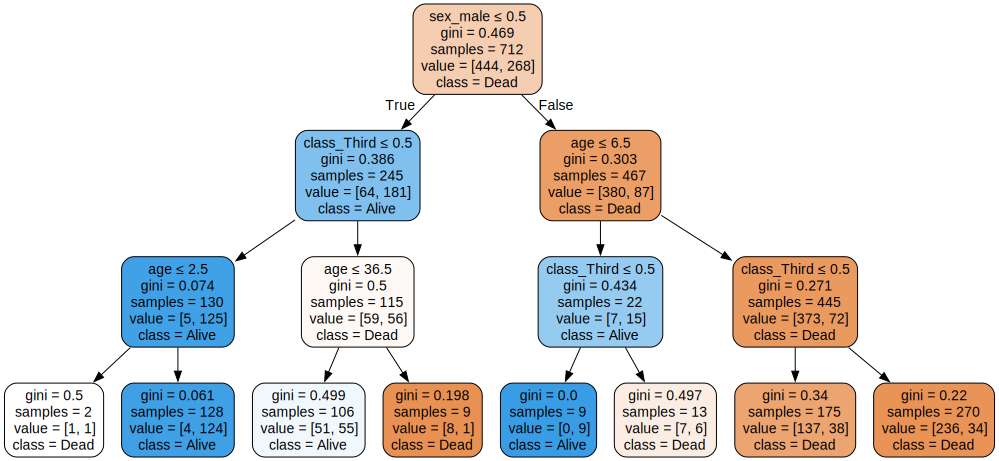

In [50]:
# Celda 6: Visualización con Graphviz
features = X.columns
targets = ['Dead', 'Alive']
data = export_graphviz(tree, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

In [ ]:
# Guardar el gráfico en un archivo PNG
graph.format = 'png'
graph.render(filename='tree_image', directory='./', cleanup=True)

# Arbol de Decision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


"Kyphosis" se refiere a una curvatura excesiva hacia adelante de la columna vertebral. Es una condición en la que la columna vertebral se curva hacia adelante en la región torácica, lo que puede resultar en una apariencia redondeada o jorobada de la espalda. Las palabras "absent" y "present" son términos opuestos que se utilizan para describir la presencia o ausencia de algo o alguien

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

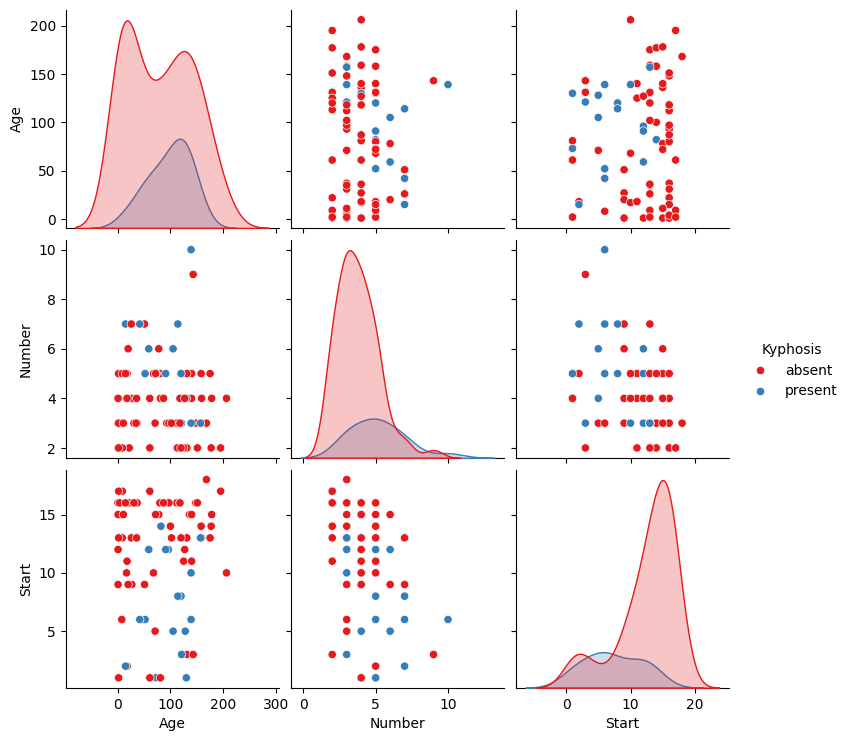

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

se dividirá el conjunto de datos en dos partes distintas: un conjunto de entrenamiento (training set) y un conjunto de prueba (test set). Esta división es comúnmente utilizada en machine learning para evaluar el rendimiento de un modelo.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)  #creo DataFrame excepto la columna llamada 'Kyphosis'. X representa variables independientes que se utilizarán para predecir la variable objetivo 'Kyphosis'.
y = df['Kyphosis']  # Esta Serie representa la variable objetivo que estás tratando de predecir o clasificar.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)   #está dividiendo tus datos en conjuntos de entrenamiento y prueba 

* X_train: Conjunto de entrenamiento de características (variables independientes). Estos son los datos que se utilizarán para entrenar tu modelo.

* X_test: Conjunto de prueba de características (variables independientes). Estos son los datos que se utilizarán para evaluar el rendimiento del modelo después de entrenarlo.

* y_train: Conjunto de entrenamiento de etiquetas (variable dependiente o variable objetivo). Estas son las etiquetas correspondientes a los datos en el conjunto de entrenamiento de características.

* y_test: Conjunto de prueba de etiquetas (variable dependiente o variable objetivo). Estas son las etiquetas correspondientes a los datos en el conjunto de prueba de características.

* train_test_split(X, y, test_size=0.30): Esta función toma las características (X) y las etiquetas (y) y las divide en conjuntos de entrenamiento y prueba. El parámetro test_size=0.30 especifica que el 30% de los datos se utilizarán como conjunto de prueba, mientras que el 70% restante se utilizará como conjunto de entrenamiento.

In [10]:
X_train

,Age,Number,Start
19,27,4,9
53,2,2,17
26,8,3,6
46,136,4,15
35,93,3,16
17,175,5,13
29,151,2,16
64,118,4,16
69,15,5,16
37,52,5,6


### Arbol de Decision

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'present', 'absent', 'present', 'present',
       'present', 'absent', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

examinar las predicciones almacenadas en la variable predictions para evaluar el rendimiento del modelo en el conjunto de prueba y compararlas con las etiquetas reales (y_test). 

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.71      0.77        21
     present       0.14      0.25      0.18         4

    accuracy                           0.64        25
   macro avg       0.49      0.48      0.48        25
weighted avg       0.72      0.64      0.68        25



In [17]:
y_test.value_counts()

absent     21
present     4
Name: Kyphosis, dtype: int64

In [18]:
print(confusion_matrix(y_test,predictions))

[[15  6]
 [ 3  1]]


### Visualizacion del Arbol

In [28]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Graphviz\bin'

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

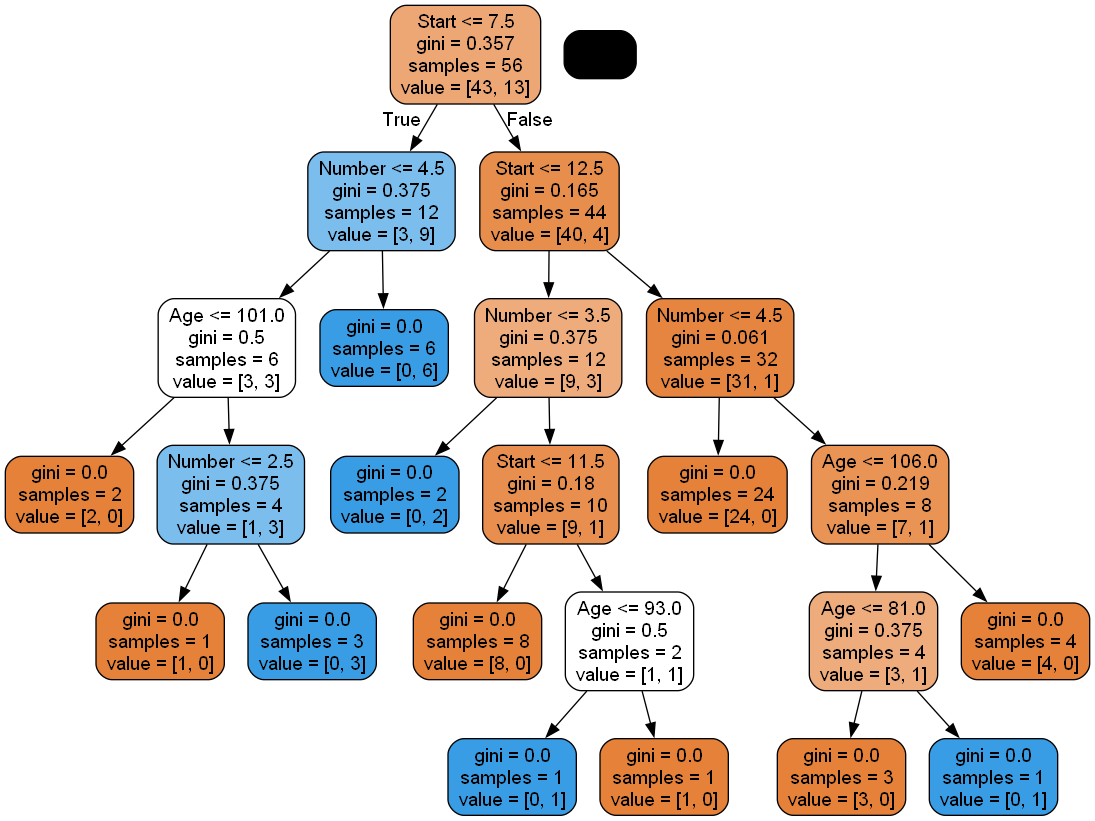

In [29]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Random Forests (Bosques Aleatorios) es un algoritmo de aprendizaje automático que se utiliza tanto para tareas de clasificación como de regresión. Es una técnica de conjunto (ensemble) que combina múltiples modelos de árboles de decisión para mejorar la precisión y la robustez del modelo

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))

[[17  4]
 [ 4  0]]


In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.81      0.81      0.81        21
     present       0.00      0.00      0.00         4

    accuracy                           0.68        25
   macro avg       0.40      0.40      0.40        25
weighted avg       0.68      0.68      0.68        25

